# Task 2: Stock Price Prediction

## Objective 1: Install Required Libraries

In [9]:
# Install yfinance for stock data
!pip install yfinance --quiet

In [11]:
# Install TensorFlow for LSTM model
!pip install tensorflow --quiet

## Objective 2:  Import Libraries

In [12]:
# Import standard libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [13]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Import deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler

## Objective 3: Load Historical Stock Data

In [18]:
# Download last 5 years of Apple's stock data
data = yf.download('AAPL', period='5y', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [19]:
# Show first 5 rows
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-08-12,109.926819,110.184588,107.288321,107.482861,165598000
2020-08-13,111.872276,112.876609,110.819305,111.308098,210082000
2020-08-14,111.772591,111.862566,109.960900,111.697206,165565200
2020-08-17,111.480743,112.920369,110.853344,112.896049,119561600
2020-08-18,112.409691,112.835255,110.897115,111.232703,105633600


## Objective 4: Exploratory Data Analysis

In [20]:
# Check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2020-08-12 to 2025-08-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1255 non-null   float64
 1   (High, AAPL)    1255 non-null   float64
 2   (Low, AAPL)     1255 non-null   float64
 3   (Open, AAPL)    1255 non-null   float64
 4   (Volume, AAPL)  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [21]:
# Summary statistics
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,168.549611,170.279554,166.653440,168.397509,7.707174e+07
std,36.128331,36.295215,35.865959,36.039158,3.798545e+07
min,103.925163,107.183782,100.287208,101.687924,2.323470e+07
25%,140.845261,142.432342,139.117995,140.606037,5.123175e+07
50%,166.449829,168.092898,164.956749,166.668474,6.840220e+07
75%,191.964760,193.683037,190.461167,192.138293,9.134325e+07
max,258.103729,259.179926,256.718662,257.276679,3.459376e+08


In [24]:
# Check Null Value
data.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

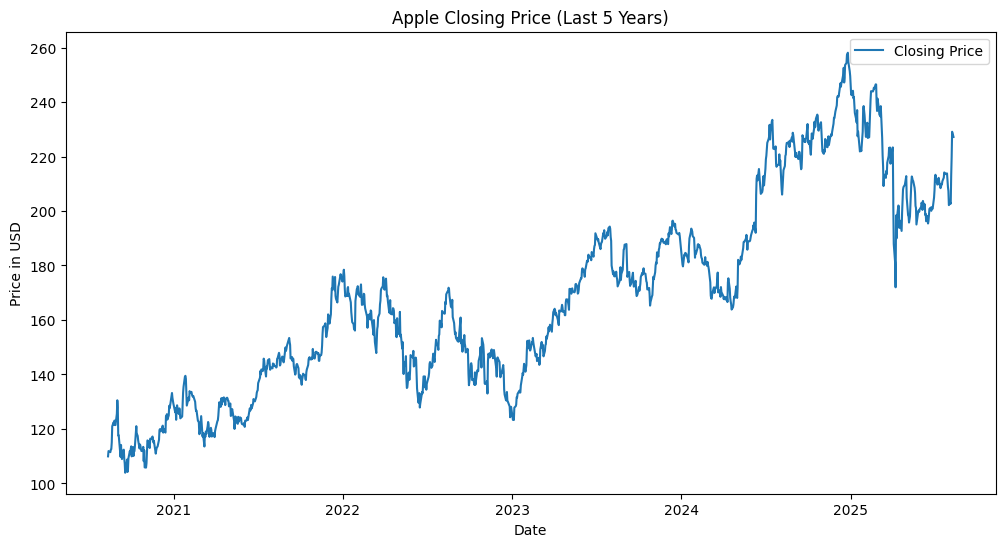

In [25]:
# Plot Closing Price over time
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Closing Price')
plt.title("Apple Closing Price (Last 5 Years)")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.show()

# PART A: Linear Regression Model

## Objective 5: Feature Selection

In [26]:
# Select relevant features
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

In [27]:
# Show first 5 rows of selected features
features.head()

Price,Open,High,Low,Volume
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2020-08-12,107.482861,110.184588,107.288321,165598000
2020-08-13,111.308098,112.876609,110.819305,210082000
2020-08-14,111.697206,111.862566,109.960900,165565200
2020-08-17,112.896049,112.920369,110.853344,119561600
2020-08-18,111.232703,112.835255,110.897115,105633600


## Objective 6: Train-Test Split

In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [29]:
# Show shapes of train and test sets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)

Training Features Shape: (1004, 4)
Testing Features Shape: (251, 4)


## Objective 7: Train Linear Regression

In [30]:
# Initialize model
lr_model = LinearRegression()

In [31]:
# Train model
lr_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Show coefficients
pd.DataFrame(lr_model.coef_.T, index=features.columns, columns=['Coefficient'])

,,Coefficient
Price,Ticker,
Open,AAPL,-5.931539e-01
High,AAPL,8.055547e-01
Low,AAPL,7.880420e-01
Volume,AAPL,2.838224e-10


## Objective 8: Predictions & Evaluation

In [34]:
# Predict on test set
y_pred_lr = lr_model.predict(X_test)

In [36]:
# Show first 10 predictions vs actual
pd.DataFrame({
    'Actual': y_test.values.flatten()[:10],
    'Predicted': y_pred_lr.flatten()[:10]
})

,Actual,Predicted
0,211.020508,210.285570
1,123.358528,126.060427
2,111.901466,111.722747
3,113.000694,113.117933
4,223.436813,223.693159
5,174.936523,173.939167
6,131.748718,131.814149
7,143.875809,143.449260
8,171.458725,172.912258
9,184.835098,184.184662


In [37]:
# Evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"LR Mean Squared Error: {mse_lr:.2f}")
print(f"LR RMSE: {rmse_lr:.2f}")
print(f"LR R² Score: {r2_lr:.4f}")

LR Mean Squared Error: 1.20
LR RMSE: 1.10
LR R² Score: 0.9990


## Objective 9: Plot Predictions

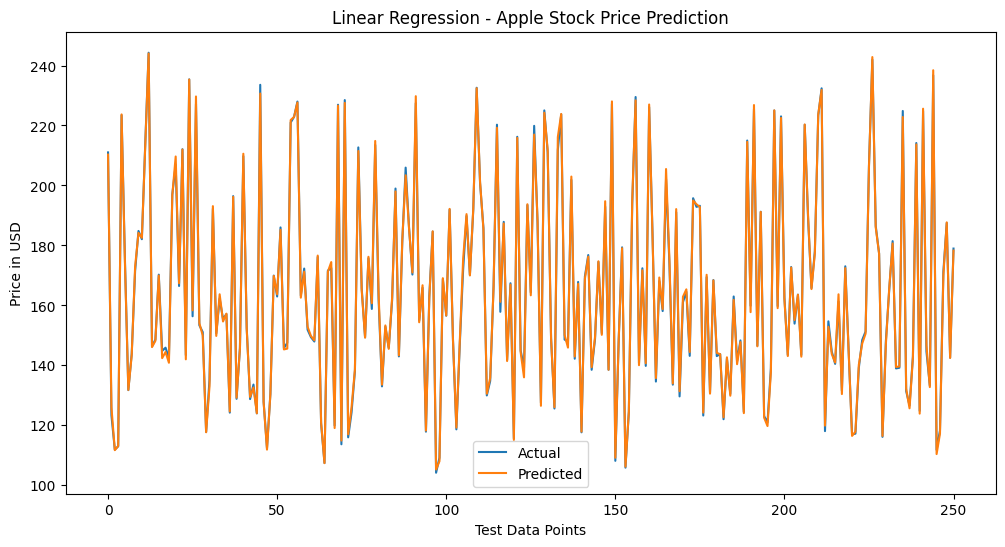

In [38]:
# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Predicted')
plt.title("Linear Regression - Apple Stock Price Prediction")
plt.xlabel("Test Data Points")
plt.ylabel("Price in USD")
plt.legend()
plt.show()

# PART B: LSTM Model

## Objective 10: Prepare Data for LSTM

In [39]:
# Use only 'Close' prices for LSTM
close_data = data[['Close']]

In [40]:
# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_data)

In [41]:
# Show scaled data
scaled_data[:5]

array([[0.03892665],
       [0.05154486],
       [0.0508983 ],
       [0.04900539],
       [0.05503053]])

## Objective 11: Create Time-Series Dataset

In [42]:
# Define function to create sequences
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [43]:
# Prepare training size (80%)
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_size]
test_data = scaled_data[training_size:]

In [44]:
# Create train dataset
X_train_lstm, y_train_lstm = create_dataset(train_data, 60)

In [45]:
# Create test dataset
X_test_lstm, y_test_lstm = create_dataset(test_data, 60)

In [46]:
# Reshape for LSTM input
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)

## Objective 12: Build LSTM Model

In [52]:
# Initialize Sequential model
lstm_model = Sequential()

In [53]:
# Add first LSTM layer
lstm_model.add(Input(shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=True))

In [54]:
# Add second LSTM layer
lstm_model.add(LSTM(50))

In [55]:
# Add Dense output layer
lstm_model.add(Dense(1))

In [56]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

## Objective 13: Train LSTM Model

In [57]:
# Train the model
history = lstm_model.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0158
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0022
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0017
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0015 
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0014
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0013
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0013
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0013 
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0014 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0011    


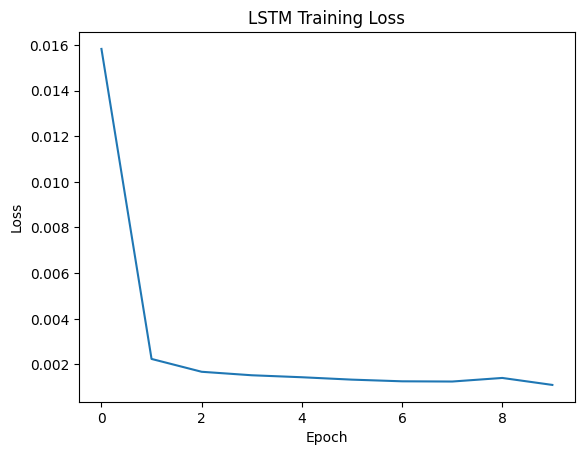

In [58]:
# Plot training loss
plt.plot(history.history['loss'])
plt.title("LSTM Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Objective 14: LSTM Predictions & Evaluation

In [59]:
# Predict on test set
y_pred_lstm = lstm_model.predict(X_test_lstm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


In [60]:
# Inverse transform to original scale
y_pred_lstm = scaler.inverse_transform(y_pred_lstm.reshape(-1,1))
y_test_lstm = scaler.inverse_transform(y_test_lstm.reshape(-1,1))

In [61]:
# Calculate RMSE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
print(f"LSTM RMSE: {rmse_lstm:.2f}")

LSTM RMSE: 9.32


## Objective 15: Plot LSTM Predictions

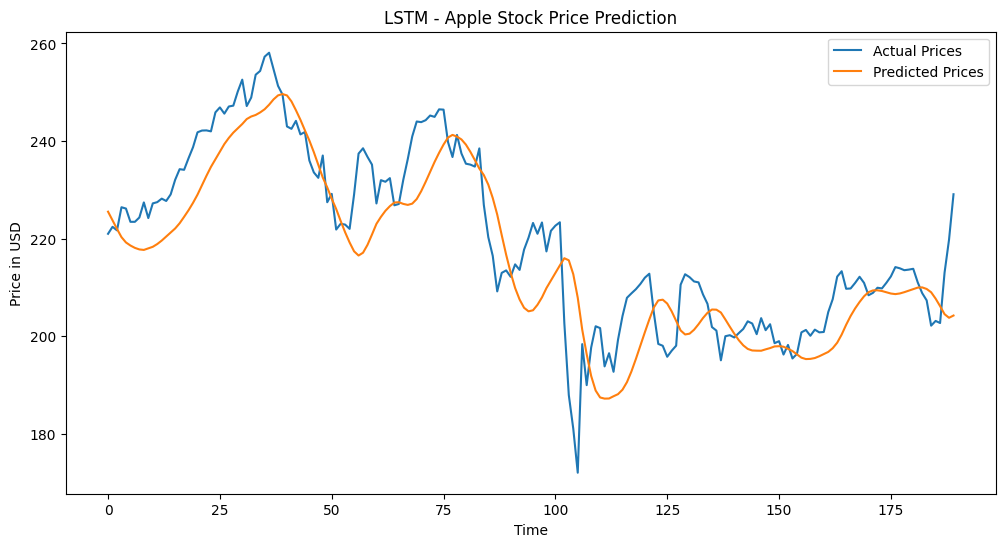

In [62]:
# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test_lstm, label='Actual Prices')
plt.plot(y_pred_lstm, label='Predicted Prices')
plt.title("LSTM - Apple Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price in USD")
plt.legend()
plt.show()